<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/%EB%B0%A9%ED%95%99%ED%94%8C%EC%A0%9D1__%EC%B5%9C%EC%A2%85%EC%B7%A8%ED%95%A9%2B%EB%B3%80%EC%88%98%EA%B2%B0%ED%95%A9%2C%EC%8A%A4%EB%AA%A8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **유전체 정보 품종 분류 AI 경진대회**

https://dacon.io/competitions/official/236035/overview/description

###**배경**
유전체 염기서열에서 획득한 유전체 변이 정보인 Single Nucleotide Polymorphism 정보는 특정 개체 및 특정 품종에 따라 다른 변이 양상을 나타낼 수 있기 때문에 동일개체를 확인하거나,동일 품종을 구분하는데 활용이 가능합니다. 따라서 이번 경진대회에서는 개체 정보와 SNP 정보를 이용하여 A, B, C 품종을 분류하는 최고의 품종구분 정확도를 획득하는 것이 목표입니다.
농축수산 현장에서는 유전체 변이정보를 이용해서 품종을 구분하는 연구를 통해 품종의 다양성 혹은 품종 부정유통을 방지하기 위해 많이 활용하게 됩니다.


###**주제**
개체와 SNP 정보를 이용하여 품종 분류 AI 모델 개발



###**설명**
시장에서 세 품종이 동시에 유통될 때, 각 품종의 고유한 생산품목(우유 및 식육)의 가치 및 가격 산정에 부정유통이 차단되기 위해 현장에서 사용 할 수 있는 AI 모델이 필요합니다.

즉, 많은 SNP 정보를 통해 분류하는 것보다, 보다 더 적은 SNP 정보로 높은 분류 성능을 내는 것이 중요합니다.

따라서 이번 경진대회에서는 개체 정보와 사전에 구성된 15개의 SNP 정보를 바탕으로 품종 분류 모델을 개발해야 합니다.



##**1. 데이터 불러오기**

In [1]:
import pandas as pd
import random
import os
import numpy as np

from sklearn import preprocessing

In [2]:
class CFG:
    SEED = 42
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(CFG.SEED) # Seed 고정

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
#train = pd.read_csv("/content/drive/MyDrive/ESAA/dacon/open/train.csv")
#test = pd.read_csv("/content/drive/MyDrive/ESAA/dacon/open/test.csv")
#snp_info = pd.read_csv("/content/drive/MyDrive/ESAA/dacon/open/snp_info.csv")
# train = pd.read_csv("/content/drive/MyDrive/ESAA/방학/DATA/train.csv")
# test = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/test.csv')
# train=pd.read_csv('/content/drive/MyDrive/readcsv/유전체/train.csv')
# test=pd.read_csv('/content/drive/MyDrive/readcsv/유전체/test.csv')
# submit = pd.read_csv('/content/drive/MyDrive/readcsv/유전체/sample_submission.csv')
train=pd.read_csv('/content/drive/MyDrive/ESAA/방학플젝1/snp_train.csv')
test=pd.read_csv('/content/drive/MyDrive/ESAA/방학플젝1/snp_test.csv')
submit=pd.read_csv('/content/drive/MyDrive/ESAA/방학플젝1/snp_sample_submission.csv')
info=pd.read_csv('/content/drive/MyDrive/ESAA/방학플젝1/snp_info.csv')

In [5]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values

    return summary

resumetable(train)

데이터 세트 형상: (262, 21)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,id,object,0,262,TRAIN_000,TRAIN_001,TRAIN_002
1,father,int64,0,1,0,0,0
2,mother,int64,0,1,0,0,0
3,gender,int64,0,1,0,0,0
4,trait,int64,0,2,2,2,2
5,SNP_01,object,0,3,G G,A G,G G
6,SNP_02,object,0,3,A G,A G,G G
7,SNP_03,object,0,3,A A,C A,A A
8,SNP_04,object,0,3,G A,A A,G A
9,SNP_05,object,0,3,C A,A A,C C


In [6]:
resumetable(test)

데이터 세트 형상: (175, 20)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,id,object,0,175,TEST_000,TEST_001,TEST_002
1,father,int64,0,1,0,0,0
2,mother,int64,0,1,0,0,0
3,gender,int64,0,1,0,0,0
4,trait,int64,0,2,1,2,2
5,SNP_01,object,0,3,A G,G G,G G
6,SNP_02,object,0,3,G G,A G,A G
7,SNP_03,object,0,3,A A,C C,A A
8,SNP_04,object,0,3,G A,G G,A A
9,SNP_05,object,0,3,A A,C C,C A


In [ ]:
train.head() #data에 null 없음 #father, mother, gender는 다 0

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C


In [ ]:
test.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,TEST_000,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A G,A G,G A,G G,C A,G A
1,TEST_001,0,0,0,2,G G,A G,C C,G G,C C,A A,A A,A A,A A,G G,A G,A A,A A,A A,A A
2,TEST_002,0,0,0,2,G G,A G,A A,A A,C A,A G,A A,A A,A A,A G,A A,G A,G G,A A,G G
3,TEST_003,0,0,0,2,G G,A G,C A,A A,C C,A A,A A,A A,A A,G G,A A,G A,A G,A A,A A
4,TEST_004,0,0,0,1,A A,G G,A A,G G,A A,G G,G G,A A,G G,A G,G G,G A,G G,A A,G G


In [7]:
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x

In [8]:
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

## **2. EDA**

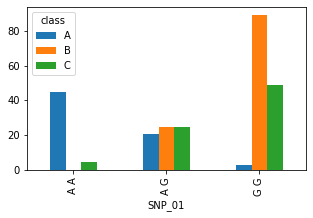

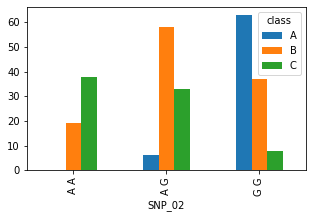

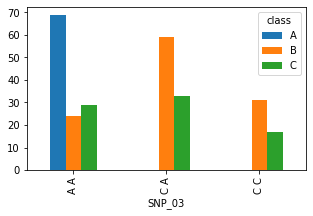

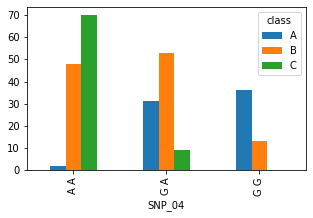

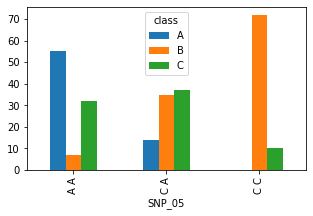

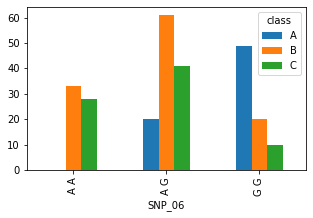

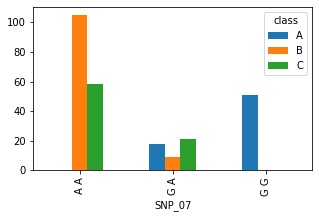

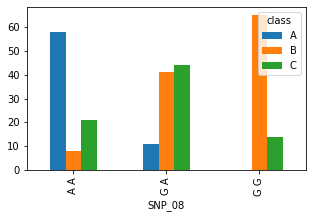

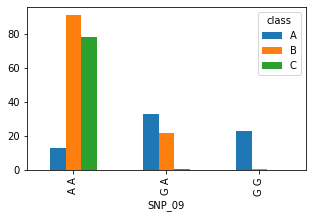

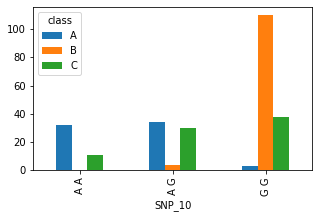

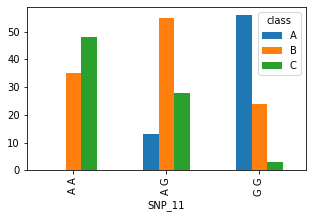

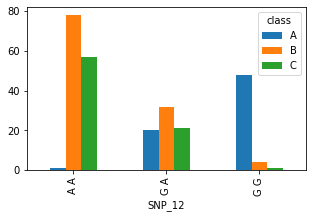

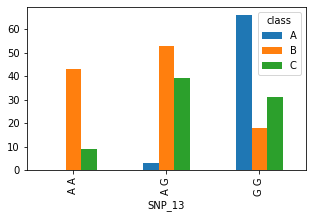

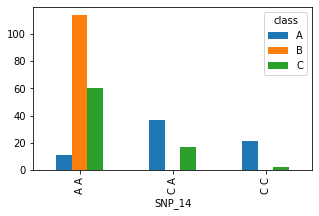

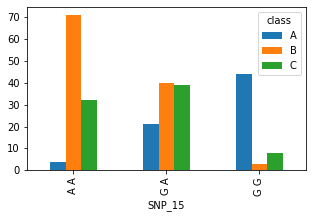

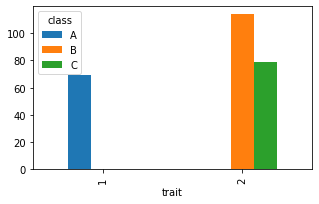

In [9]:
for g in train.columns[train.columns.str.contains('SNP')].tolist()+['trait']:
    train.groupby(g)['class'].value_counts().unstack().plot.bar(figsize=(5,3));

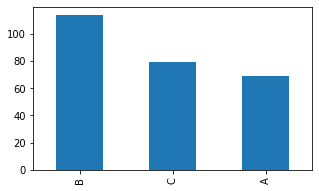

In [10]:
train['class'].value_counts().plot.bar(figsize=(5,3))

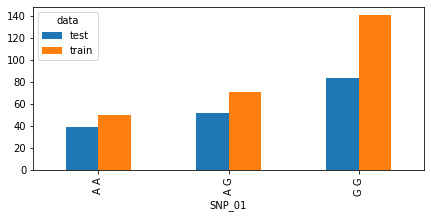

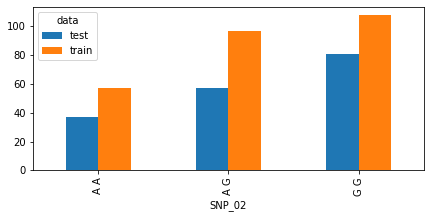

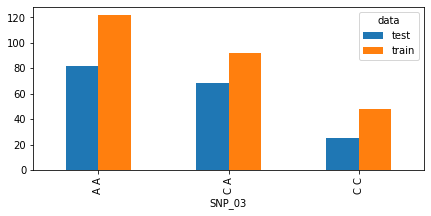

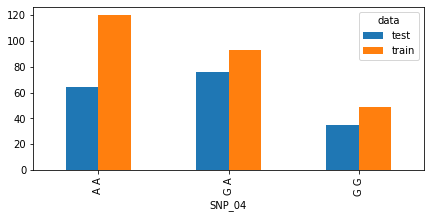

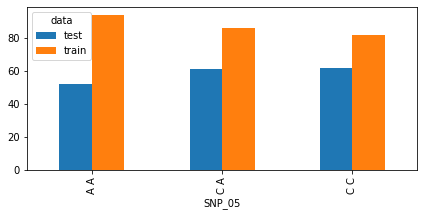

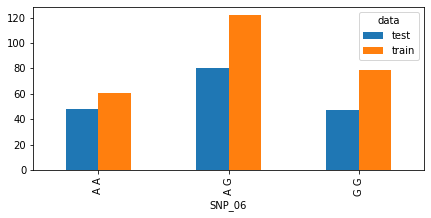

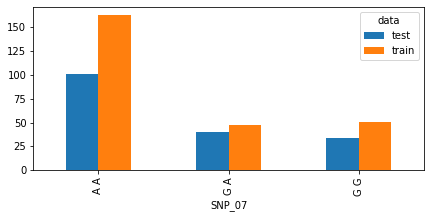

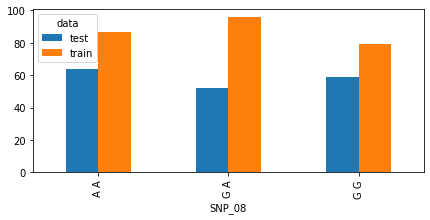

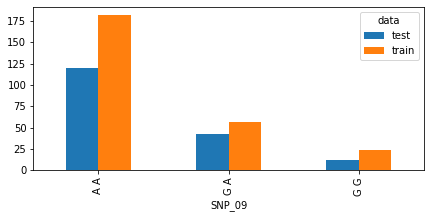

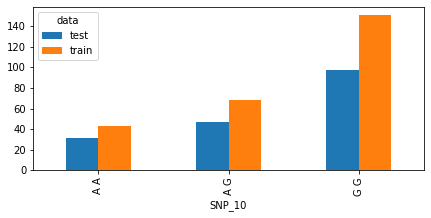

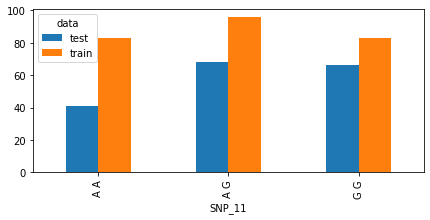

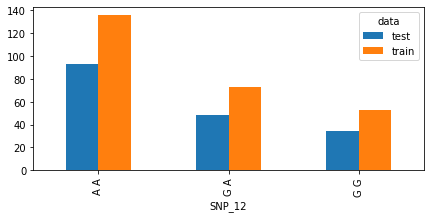

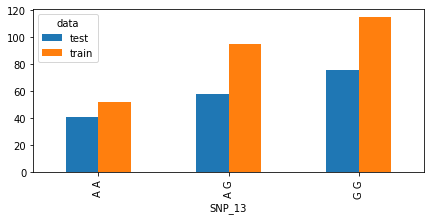

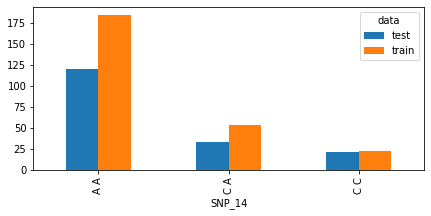

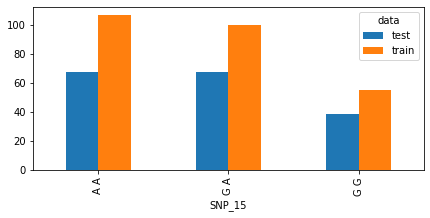

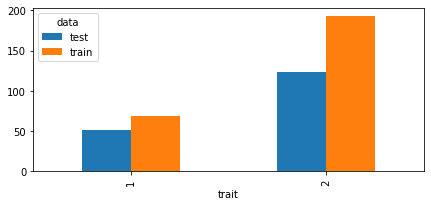

In [11]:
#train test 비교
train['data'] = 'train'
test['data'] = 'test'
tmp = pd.concat([train,test]).reset_index(drop=True)
for g in tmp.columns[tmp.columns.str.contains('SNP')].tolist()+['trait']:   
    tmp.groupby([g])['data'].value_counts().unstack().plot.bar(figsize=(7,3));

## **3. 데이터 전처리**

### **(1) 변수결합 X**

### **Label-Encoding**

In [ ]:
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

In [ ]:
class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)] #zfill(2): 길이가 2가 되도록 숫자 앞에 0을 붙임

In [ ]:
snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)

In [ ]:
train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)

LabelEncoder()

In [ ]:
for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])

### **(2) 변수 결합1 -분포기준**

* 결합기준 1) EDA 분포 비슷한 변수끼리
  * (7,12,15)
  * (4,6,11)
  * (1,5)

In [18]:
# 데이터셋 생성
train_comb1 = train.copy()
test_comb1 = test.copy()
train_comb1.drop(['father', 'mother', 'gender'], axis=1, inplace=True) #의미없는 변수 드롭
test_comb1.drop(['father', 'mother', 'gender'], axis=1, inplace=True)

In [19]:
# 변수 결합1 -분포기준
train_comb1["SNP_7_12_15"] = (train['SNP_07'].astype(str)+ "_"+ train['SNP_12'].astype(str)+ "_"+ train['SNP_15'].astype(str))
train_comb1.drop(['SNP_07', 'SNP_12', 'SNP_15'], axis=1, inplace=True)
train_comb1["SNP_7_12_15"].astype(object) #문자열을 범주형으로 형변환

train_comb1["SNP_4_6_11"] = (train['SNP_04'].astype(str)+ "_"+ train['SNP_06'].astype(str)+ "_"+ train['SNP_11'].astype(str))
train_comb1.drop(['SNP_04', 'SNP_06', 'SNP_11'], axis=1, inplace=True)
train_comb1["SNP_4_6_11"].astype(object)

train_comb1["SNP_1_5"] = (train['SNP_01'].astype(str)+ "_"+ train['SNP_05'].astype(str))
train_comb1.drop(['SNP_01', 'SNP_05'], axis=1, inplace=True)
train_comb1["SNP_1_5"].astype(object)

test_comb1["SNP_7_12_15"] = (test['SNP_07'].astype(str)+ "_"+ test['SNP_12'].astype(str)+ "_"+ test['SNP_15'].astype(str))
test_comb1.drop(['SNP_07', 'SNP_12', 'SNP_15'], axis=1, inplace=True)
test_comb1["SNP_7_12_15"].astype(object)

test_comb1["SNP_4_6_11"] = (test['SNP_04'].astype(str)+ "_"+ test['SNP_06'].astype(str)+ "_"+ test['SNP_11'].astype(str))
test_comb1.drop(['SNP_04', 'SNP_06', 'SNP_11'], axis=1, inplace=True)
test_comb1["SNP_4_6_11"].astype(object)

test_comb1["SNP_1_5"] = (test['SNP_01'].astype(str)+ "_"+ test['SNP_05'].astype(str))
test_comb1.drop(['SNP_01', 'SNP_05'], axis=1, inplace=True)
test_comb1["SNP_1_5"].astype(object)

train_comb1.head()

,id,trait,SNP_02,SNP_03,SNP_08,SNP_09,SNP_10,SNP_13,SNP_14,class,SNP_7_12_15,SNP_4_6_11,SNP_1_5
0,TRAIN_000,2,A G,A A,G G,A A,G G,A A,A A,B,A A_A A_A A,G A_A A_A G,G G_C A
1,TRAIN_001,2,A G,C A,G A,A A,A G,G G,A A,C,A A_G A_A A,A A_A G_A A,A G_A A
2,TRAIN_002,2,G G,A A,G A,G A,A G,A A,A A,B,A A_A A_A A,G A_G G_A A,G G_C C
3,TRAIN_003,1,G G,A A,A A,G G,A G,G G,A A,A,G G_G G_G G,G A_G G_G G,A A_A A
4,TRAIN_004,2,G G,C C,A A,A A,G G,A G,A A,C,A A_A A_G A,A A_A A_A A,G G_C C


In [20]:
train_comb1.isnull().sum() #결측치없음

id             0
trait          0
SNP_02         0
SNP_03         0
SNP_08         0
SNP_09         0
SNP_10         0
SNP_13         0
SNP_14         0
class          0
SNP_7_12_15    0
SNP_4_6_11     0
SNP_1_5        0
dtype: int64

In [36]:
# train, test 비교
train_a = set(list(train_comb1['SNP_7_12_15'].values))
test_a = set(list(test_comb1['SNP_7_12_15'].values))
print(test_a - train_a)
print(train_a - test_a)

train_b = set(list(train_comb1['SNP_4_6_11'].values))
test_b = set(list(test_comb1['SNP_4_6_11'].values))
print(test_b - train_b)
print(train_b - test_b)

train_c = set(list(train_comb1['SNP_1_5'].values))
test_c = set(list(test_comb1['SNP_1_5'].values))
print(test_c - train_c)
print(train_c - test_c)

## test와 train의 구성이 다르다.
## 따라서 인코딩할때 따로해야함.

set()
{'A A_G G_A A', 'G G_A A_G G', 'G A_G G_A A', 'G G_G A_A A', 'A A_G G_G A'}
set()
{'G G_A A_A A', 'A A_G G_A A', 'G A_G G_A A'}
{'A A_C C'}
set()


### **Label Encoding**

In [28]:
train_x_c1, train_y_c1 = get_x_y(train_comb1)
test_x_c1 = get_x_y(test_comb1)

In [29]:
class_le = preprocessing.LabelEncoder()
snp_le_train = preprocessing.LabelEncoder()
snp_le_test = preprocessing.LabelEncoder()
snp_col = ['SNP_02','SNP_03','SNP_08',
           'SNP_09','SNP_10','SNP_13','SNP_14',
           'SNP_7_12_15', 'SNP_4_6_11', 'SNP_1_5']
     
snp_data_train = []
for col in snp_col:
    snp_data_train += list(train_x_c1[col].values)
snp_data_test = []
for col in snp_col:
    snp_data_test += list(test_x_c1[col].values)

train_y_c1 = class_le.fit_transform(train_y_c1)
snp_le_train.fit(snp_data_train)
snp_le_test.fit(snp_data_test)

for col in train_x_c1.columns:
    if col in snp_col:
        train_x_c1[col] = snp_le_train.transform(train_x_c1[col])
for col in test_x_c1.columns:
    if col in snp_col:
        test_x_c1[col] = snp_le_test.transform(test_x_c1[col])

### **(3) 변수 결합2 -이름기준** 

* 결합기준 2) 이름 비슷한 변수끼리
  * BovineHD (5,6,8) 
  * ARS-BFGL-NGS (3,4,9,11)
  * Hapmap (7,12,14)


In [14]:
info

,SNP_id,name,chrom,cm,pos
0,SNP_01,BTA-19852-no-rs,2,67.05460,42986890
1,SNP_02,ARS-USMARC-Parent-DQ647190-rs29013632,6,31.15670,13897068
2,SNP_03,ARS-BFGL-NGS-117009,6,68.28920,44649549
3,SNP_04,ARS-BFGL-NGS-60567,6,77.87490,53826064
4,SNP_05,BovineHD0600017032,6,80.50150,61779512
5,SNP_06,BovineHD0600017424,6,80.59540,63048481
6,SNP_07,Hapmap49442-BTA-111073,6,80.78000,64037334
7,SNP_08,BovineHD0600018638,6,82.68560,67510588
8,SNP_09,ARS-BFGL-NGS-37727,6,86.87400,73092782
9,SNP_10,BTB-01558306,7,62.06920,40827112


In [32]:
# 데이터셋 생성
train_comb2 = train.copy()
test_comb2 = test.copy()
train_comb2.drop(['father', 'mother', 'gender'], axis=1, inplace=True) #의미없는 변수 드롭
test_comb2.drop(['father', 'mother', 'gender'], axis=1, inplace=True)

In [34]:
# 변수 결합2 -이름기준
train_comb2["SNP_5_6_8"] = (train['SNP_05'].astype(str)+ "_"+ train['SNP_06'].astype(str)+ "_"+ train['SNP_08'].astype(str))
train_comb2.drop(['SNP_05', 'SNP_06', 'SNP_08'], axis=1, inplace=True)
train_comb2["SNP_5_6_8"].astype(object) #문자열을 범주형변수로 변환

train_comb2["SNP_3_4_9_11"] = (train['SNP_03'].astype(str)+ "_"+ train['SNP_04'].astype(str)+ "_"+ train['SNP_09'].astype(str)+ "_"+ train['SNP_11'].astype(str))
train_comb2.drop(['SNP_03', 'SNP_04', 'SNP_09', 'SNP_11'], axis=1, inplace=True)
train_comb2["SNP_3_4_9_11"].astype(object)

train_comb2["SNP_7_12_14"] = (train['SNP_07'].astype(str)+ "_"+ train['SNP_12'].astype(str)+ "_"+ train['SNP_14'].astype(str))
train_comb2.drop(['SNP_07', 'SNP_12', 'SNP_14'], axis=1, inplace=True)
train_comb2["SNP_7_12_14"].astype(object)

test_comb2["SNP_5_6_8"] = (train['SNP_05'].astype(str)+ "_"+ train['SNP_06'].astype(str)+ "_"+ train['SNP_08'].astype(str))
test_comb2.drop(['SNP_05', 'SNP_06', 'SNP_08'], axis=1, inplace=True)
test_comb2["SNP_5_6_8"].astype(object) #문자열을 범주형변수로 변환

test_comb2["SNP_3_4_9_11"] = (train['SNP_03'].astype(str)+ "_"+ train['SNP_04'].astype(str)+ "_"+ train['SNP_09'].astype(str)+ "_"+ train['SNP_11'].astype(str))
test_comb2.drop(['SNP_03', 'SNP_04', 'SNP_09', 'SNP_11'], axis=1, inplace=True)
test_comb2["SNP_3_4_9_11"].astype(object)

test_comb2["SNP_7_12_14"] = (train['SNP_07'].astype(str)+ "_"+ train['SNP_12'].astype(str)+ "_"+ train['SNP_14'].astype(str))
test_comb2.drop(['SNP_07', 'SNP_12', 'SNP_14'], axis=1, inplace=True)
test_comb2["SNP_7_12_14"].astype(object)

train_comb2.head()

,id,trait,SNP_01,SNP_02,SNP_10,SNP_13,SNP_15,class,SNP_5_6_8,SNP_3_4_9_11,SNP_7_12_14
0,TRAIN_000,2,G G,A G,G G,A A,A A,B,C A_A A_G G,A A_G A_A A_A G,A A_A A_A A
1,TRAIN_001,2,A G,A G,A G,G G,A A,C,A A_A G_G A,C A_A A_A A_A A,A A_G A_A A
2,TRAIN_002,2,G G,G G,A G,A A,A A,B,C C_G G_G A,A A_G A_G A_A A,A A_A A_A A
3,TRAIN_003,1,A A,G G,A G,G G,G G,A,A A_G G_A A,A A_G A_G G_G G,G G_G G_A A
4,TRAIN_004,2,G G,G G,G G,A G,G A,C,C C_A A_A A,C C_A A_A A_A A,A A_A A_A A


In [35]:
train_comb2.isnull().sum() #결측치없음

id              0
trait           0
SNP_01          0
SNP_02          0
SNP_10          0
SNP_13          0
SNP_15          0
class           0
SNP_5_6_8       0
SNP_3_4_9_11    0
SNP_7_12_14     0
dtype: int64

In [38]:
# train, test 비교
train_a = set(list(train_comb2['SNP_5_6_8'].values))
test_a = set(list(test_comb2['SNP_5_6_8'].values))
print(test_a - train_a)
print(train_a - test_a)

train_b = set(list(train_comb2['SNP_3_4_9_11'].values))
test_b = set(list(test_comb2['SNP_3_4_9_11'].values))
print(test_b - train_b)
print(train_b - test_b)

train_c = set(list(train_comb2['SNP_7_12_14'].values))
test_c = set(list(test_comb2['SNP_7_12_14'].values))
print(test_c - train_c)
print(train_c - test_c)

## test와 train의 구성이 다르다.
## 따라서 인코딩할때 따로해야함.

set()
{'C A_A A_A A'}
set()
{'C C_G G_A A_A G', 'C C_G A_G A_A G', 'A A_G A_G G_A G', 'A A_G G_A A_A G', 'A A_A A_G G_A A', 'C A_G G_G A_A G'}
set()
{'G G_A A_A A', 'G A_A A_C A'}


### **Label Encoding**

In [40]:
train_x_c2, train_y_c2 = get_x_y(train_comb2)
test_x_c2 = get_x_y(test_comb2)

In [41]:
class_le = preprocessing.LabelEncoder()
snp_le_train = preprocessing.LabelEncoder()
snp_le_test = preprocessing.LabelEncoder()
snp_col = ['SNP_01',	'SNP_02',	'SNP_10',	'SNP_13',	'SNP_15',	
           'SNP_5_6_8',	'SNP_3_4_9_11',	'SNP_7_12_14']
     
snp_data_train = []
for col in snp_col:
    snp_data_train += list(train_x_c2[col].values)
snp_data_test = []
for col in snp_col:
    snp_data_test += list(test_x_c2[col].values)

train_y_c2 = class_le.fit_transform(train_y_c2)
snp_le_train.fit(snp_data_train)
snp_le_test.fit(snp_data_test)

for col in train_x_c2.columns:
    if col in snp_col:
        train_x_c2[col] = snp_le_train.transform(train_x_c2[col])
for col in test_x_c2.columns:
    if col in snp_col:
        test_x_c2[col] = snp_le_test.transform(test_x_c2[col])

### **(4) SMOTE**


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


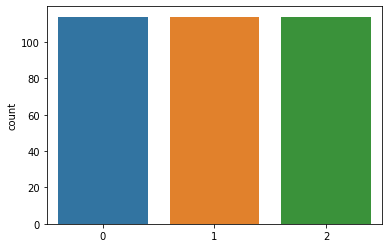

In [51]:
# 변수결합x
from imblearn.over_sampling import SMOTE
train_x_s, train_y_s = SMOTE().fit_resample(train_x, train_y)

import seaborn as sns
sns.countplot(train_y_s)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


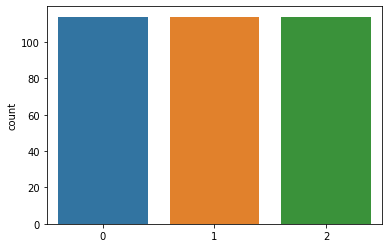

In [52]:
# 변수결합1 -분포기준
train_x_c1_s, train_y_c1_s = SMOTE().fit_resample(train_x_c1, train_y_c1)
sns.countplot(train_y_c1_s)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


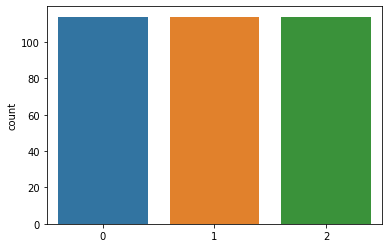

In [53]:
# 변수결합2 -이름기준
train_x_c2_s, train_y_c2_s = SMOTE().fit_resample(train_x_c2, train_y_c2)
sns.countplot(train_y_c2_s)

## **4. 모델 적합**

In [57]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred, average='macro') #'micro', 'weighted'도 가능
    recall = recall_score(y_test , pred, average='macro')
    f1 = f1_score(y_test,pred, average='macro')
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

In [55]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

### **케이스에 따라 분할**

In [67]:
X_train, X_tr_test, y_train, y_tr_test = train_test_split(train_x, train_y, test_size=0.2, random_state=156) #변수결합x
X_train_s, X_tr_test_s, y_train_s, y_tr_test_s = train_test_split(train_x_s, train_y_s, test_size=0.2, random_state=156) #변수결합x +스모트
X_train_c1, X_tr_test_c1, y_train_c1, y_tr_test_c1 = train_test_split(train_x_c1, train_y_c1, test_size=0.2, random_state=156) #변수결합1
X_train_c2, X_tr_test_c2, y_train_c2, y_tr_test_c2 = train_test_split(train_x_c2, train_y_c2, test_size=0.2, random_state=156) #변수결합1 +스모트
X_train_c1_s, X_tr_test_c1_s, y_train_c1_s, y_tr_test_c1_s = train_test_split(train_x_c1_s, train_y_c1_s, test_size=0.2, random_state=156) #변수결합2
X_train_c2_s, X_tr_test_c2_s, y_train_c2_s, y_tr_test_c2_s = train_test_split(train_x_c2_s, train_y_c2_s, test_size=0.2, random_state=156) #변수결합2 +스모트

### **4-1. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
dt_clf=DecisionTreeClassifier()
get_model_train_eval(dt_clf, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[11  0  0]
 [ 0 20  5]
 [ 0  3 14]]
정확도: 0.8491, 정밀도: 0.8688, 재현율: 0.8745, F1: 0.8704


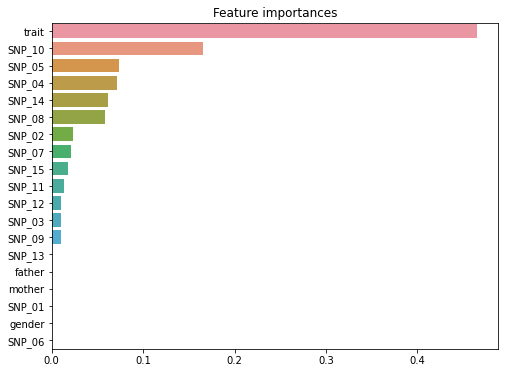

In [ ]:
# feature 중요도
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
dt_preds=dt_clf.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(dt_preds)
# submit.to_csv('/content/drive/MyDrive/readcsv/유전체/submit_dt.csv', index=False)

### **4-2. Random Forest**

#### 여러 알고리즘 돌린 결과, 랜덤포레스트가 가장 정확도가 높다.   
따라서 랜덤포레스트로 변수결합+스모트 적용하여 결과값 도출해보기로 한다.

In [60]:
from sklearn.ensemble import RandomForestClassifier
#변수결합x
rf_clf = RandomForestClassifier()
get_model_train_eval(rf_clf, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

#변수결합x +스모트
rf_clf_s = RandomForestClassifier()
get_model_train_eval(rf_clf_s, ftr_train=X_train_s, ftr_test=X_tr_test_s, tgt_train=y_train_s, tgt_test=y_tr_test_s)
# smote안한 것이 f1더 높다.

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
오차 행렬
[[26  0  0]
 [ 0 23  1]
 [ 0  3 16]]
정확도: 0.9420, 정밀도: 0.9419, 재현율: 0.9335, F1: 0.9363


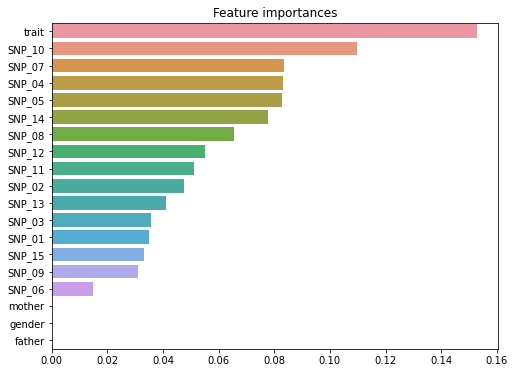

In [ ]:
# feature 중요도
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
# 변수결합x
rf_preds=rf_clf.predict(test_x)
submit['class'] = class_le.inverse_transform(rf_preds)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학플젝1/submit_rf.csv', index=False)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_rf.csv', index=False)

#변수결합x +스모트
rf_preds_s=rf_clf_s.predict(test_x)
submit['class'] = class_le.inverse_transform(rf_preds_s)
submit.to_csv('/content/drive/MyDrive/ESAA/방학플젝1/submit_rf_s.csv', index=False)

In [ ]:
rf_clf1 = RandomForestClassifier()
parameters = {'max_depth': [4, 6, 8, 10, 12, None],
              'min_samples_split': [2, 3, 4, 5, 8, 12, 16, 20],
              'min_samples_leaf' : [8, 12, 15, 18],
              'n_estimators': [10, 30, 50, 80, 100, 120, 150, 200]
}


rf_grid = GridSearchCV(rf_clf1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose = True)
rf_grid.fit(X_train, y_train)

print(rf_grid.best_score_)
print(rf_grid.best_params_)

Fitting 2 folds for each of 1536 candidates, totalling 3072 fits
0.9330128205128205
{'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 12, 'n_estimators': 50}


In [ ]:
#변수결합x +그리드
rf_model = RandomForestClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=12, n_estimators=50)
get_model_train_eval(rf_model, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

#변수결합x +그리드 +스모트
rf_model_s = RandomForestClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=12, n_estimators=50)
get_model_train_eval(rf_model_s, ftr_train=X_train_s, ftr_test=X_tr_test_s, tgt_train=y_train_s, tgt_test=y_tr_test_s)
# smote안한 것이 f1 더 높다.

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
오차 행렬
[[26  0  0]
 [ 0 23  1]
 [ 0  3 16]]
정확도: 0.9420, 정밀도: 0.9419, 재현율: 0.9335, F1: 0.9363


In [ ]:
#변수결합x +그리드
rf_preds_grid=rf_model.predict(test_x)
submit['class'] = class_le.inverse_transform(rf_preds_grid)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_rf_model.csv', index=False)

#변수결합x +그리드 +스모트
rf_preds_grid_s=rf_model_s.predict(test_x)
submit['class'] = class_le.inverse_transform(rf_preds_grid_s)
submit.to_csv('/content/drive/MyDrive/ESAA/방학플젝1/submit_rf_grid_s.csv', index=False)

### **변수결합 적용**

In [69]:
#변수결합1
rf_clf_c1 = RandomForestClassifier()
get_model_train_eval(rf_clf_c1, ftr_train=X_train_c1, ftr_test=X_tr_test_c1, tgt_train=y_train_c1, tgt_test=y_tr_test_c1)

#변수결합1 +스모트
rf_clf_c1_s = RandomForestClassifier()
get_model_train_eval(rf_clf_c1_s, ftr_train=X_train_c1_s, ftr_test=X_tr_test_c1_s, tgt_train=y_train_c1_s, tgt_test=y_tr_test_c1_s)

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
오차 행렬
[[26  0  0]
 [ 0 24  0]
 [ 0  3 16]]
정확도: 0.9565, 정밀도: 0.9630, 재현율: 0.9474, F1: 0.9518


In [68]:
#변수결합2 
rf_clf_c2 = RandomForestClassifier()
get_model_train_eval(rf_clf_c2, ftr_train=X_train_c2, ftr_test=X_tr_test_c2, tgt_train=y_train_c2, tgt_test=y_tr_test_c2)

#변수결합2 +스모트
rf_clf_c2_s = RandomForestClassifier()
get_model_train_eval(rf_clf_c2_s, ftr_train=X_train_c2_s, ftr_test=X_tr_test_c2_s, tgt_train=y_train_c2_s, tgt_test=y_tr_test_c2_s)

오차 행렬
[[11  0  0]
 [ 0 23  2]
 [ 0  0 17]]
정확도: 0.9623, 정밀도: 0.9649, 재현율: 0.9733, F1: 0.9676
오차 행렬
[[26  0  0]
 [ 0 24  0]
 [ 0  1 18]]
정확도: 0.9855, 정밀도: 0.9867, 재현율: 0.9825, F1: 0.9842


In [75]:
#변수결합1
rf_clf_c1.fit(X_train_c1, y_train_c1)
rf_preds_c1=rf_clf_c1.predict(test_x_c1)
submit['class'] = class_le.inverse_transform(rf_preds_c1)
submit.to_csv('/content/drive/MyDrive/ESAA/방학플젝1/submit_rf_c1.csv', index=False)

#변수결합1 +스모트
rf_clf_c1_s.fit(X_train_c1_s, y_train_c1_s)
rf_preds_c1_s=rf_clf_c1_s.predict(test_x_c1)
submit['class'] = class_le.inverse_transform(rf_preds_c1_s)
submit.to_csv('/content/drive/MyDrive/ESAA/방학플젝1/submit_rf_c1_s.csv', index=False)

In [77]:
#변수결합2 
rf_clf_c2.fit(X_train_c2, y_train_c2)
rf_preds_c2=rf_clf_c2.predict(test_x_c2)
submit['class'] = class_le.inverse_transform(rf_preds_c2)
submit.to_csv('/content/drive/MyDrive/ESAA/방학플젝1/submit_rf_c2.csv', index=False)

#변수결합2 +스모트
rf_clf_c2_s.fit(X_train_c2_s, y_train_c2_s)
rf_preds_c2_s=rf_clf_c2_s.predict(test_x_c2)
submit['class'] = class_le.inverse_transform(rf_preds_c2_s)
submit.to_csv('/content/drive/MyDrive/ESAA/방학플젝1/submit_rf_c2_s.csv', index=False)

### **4-3. XGBoost**

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')

In [ ]:
xgb_clf = XGBClassifier()
get_model_train_eval(xgb_clf, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834


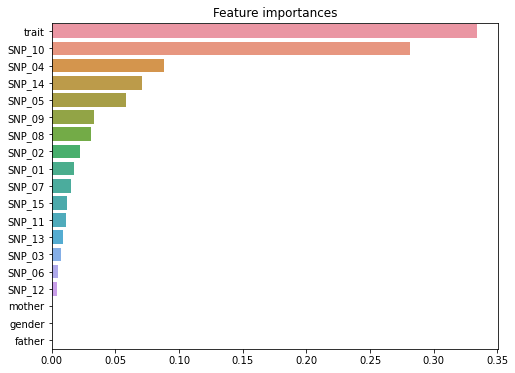

In [ ]:
# feature 중요도
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = xgb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
xgb_preds = xgb_clf.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(xgb_preds)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_xgb.csv', index=False)

### **4-4. GBM**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_clf = GradientBoostingClassifier()
get_model_train_eval(gbm_clf, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834


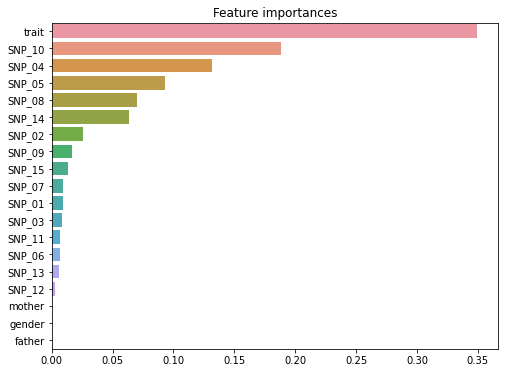

In [ ]:
# feature 중요도
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = gbm_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
gbm_preds = gbm_clf.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(gbm_preds)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_gbm.csv', index=False)

### **4-5. Light GBM**

In [ ]:
from lightgbm import LGBMClassifier
import lightgbm as lgbm
lgbm_clf = LGBMClassifier()
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834


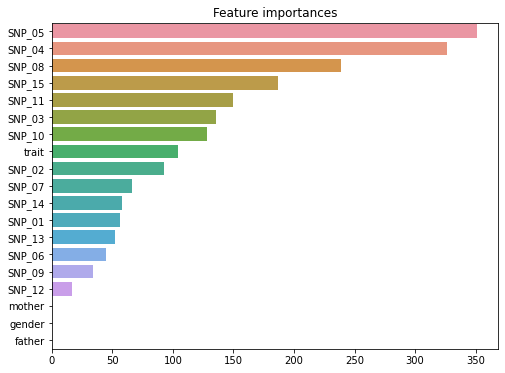

In [ ]:
# feature 중요도
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = lgbm_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
lgbm_preds = lgbm_clf.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(lgbm_preds)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_lgbm.csv', index=False)

In [ ]:
lgbm_clf1 = LGBMClassifier()
parameters = {'max_depth': [4,6,8,10],
              'learning_rate': [0.01,0.03,0.1,0.15],
              'n_estimators': [100,300,500]
}


lgbm_grid = GridSearchCV(lgbm_clf1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose = True)
lgbm_grid.fit(X_train, y_train)

print(lgbm_grid.best_score_)
print(lgbm_grid.best_params_)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
0.9568681318681318
{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 500}


In [ ]:
lgbm_model = LGBMClassifier(learning_rate=0.03,max_depth=4,n_estimator=500)
get_model_train_eval(lgbm_model, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  3 14]]
정확도: 0.9434, 정밀도: 0.9643, 재현율: 0.9412, F1: 0.9489


In [ ]:
lgbm_preds1 = lgbm_model.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(lgbm_preds1)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_lgbm_model.csv', index=False)

### **4-6. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[10  0  1]
 [ 0 23  2]
 [ 0  1 16]]
정확도: 0.9245, 정밀도: 0.9335, 재현율: 0.9234, F1: 0.9267


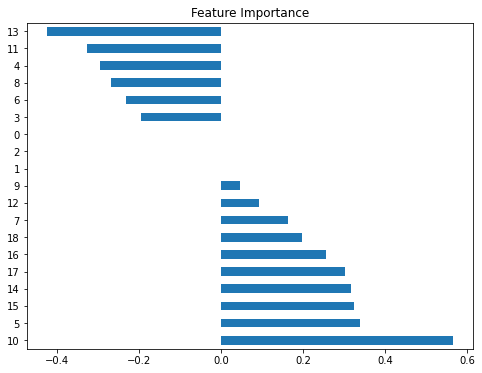

In [ ]:
# feature 중요도 # 'LogisticRegression' object has no attribute 'feature_importances_'
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

importance = lr_clf.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')
plt.show()

In [ ]:
lr_preds = lr_clf.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(lr_preds)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_lr.csv', index=False)

### **4-7. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
get_model_train_eval(knn_clf, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[11  0  0]
 [ 0 24  1]
 [ 0  2 15]]
정확도: 0.9434, 정밀도: 0.9535, 재현율: 0.9475, F1: 0.9501


In [ ]:
# feature 중요도 # 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [ ]:
knn_preds = knn_clf.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(knn_preds)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_knn.csv', index=False)

In [ ]:
parameters = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
knn_clf1 = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_clf1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose = True)
knn_grid.fit(X_train, y_train)

print(knn_grid.best_score_)
print(knn_grid.best_params_)

Fitting 2 folds for each of 114 candidates, totalling 228 fits
0.8899267399267399
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


In [ ]:
knn_model = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='uniform')
get_model_train_eval(knn_model, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  2 15]]
정확도: 0.9623, 정밀도: 0.9753, 재현율: 0.9608, F1: 0.9663


In [ ]:
knn_preds1 = knn_model.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(knn_preds1)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_knn_model.csv', index=False)

### **4-8. Extra Trees Classifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
extra_clf=ExtraTreesClassifier()
get_model_train_eval(extra_clf, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834


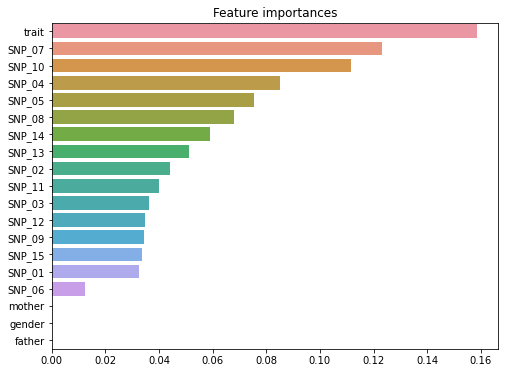

In [ ]:
# feature 중요도
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = extra_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [ ]:
extra_preds = extra_clf.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(extra_preds)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_extra.csv', index=False)

##**5. 변수결합**

###**5-1**
5, 6, 8 결합

In [ ]:
train_comb = pd.read_csv("/content/drive/MyDrive/ESAA/방학/DATA/train.csv")
test_comb = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/test.csv')

In [ ]:
train_comb["SNP_05_06_08"] = (train_comb['SNP_05'].astype(str)+ "_"+ train_comb['SNP_06'].astype(str)+ "_"+ train_comb['SNP_08'].astype(str))
test_comb["SNP_05_06_08"] = (test_comb['SNP_05'].astype(str)+ "_"+ test_comb['SNP_06'].astype(str)+ "_"+ test_comb['SNP_08'].astype(str))
train_comb.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class,SNP_05_06_08
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,G G,A A,G G,A G,A A,A A,A A,A A,B,C A_A A_G G
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,G A,A A,A G,A A,G A,G G,A A,A A,C,A A_A G_G A
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,G A,G A,A G,A A,A A,A A,A A,A A,B,C C_G G_G A
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,A A,G G,A G,G G,G G,G G,A A,G G,A,A A_G G_A A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,G G,A A,A A,A G,A A,G A,C,C C_A A_A A


In [ ]:
train_comb = train_comb.drop(['SNP_05','SNP_06','SNP_08'], axis=1)
train_comb["SNP_05_06_08"].astype(object)
test_comb = test_comb.drop(['SNP_05','SNP_06','SNP_08'], axis=1)
test_comb["SNP_05_06_08"].astype(object)
train_comb.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_07,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class,SNP_05_06_08
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,A A,A A,G G,A G,A A,A A,A A,A A,B,C A_A A_G G
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,A A,A G,A A,G A,G G,A A,A A,C,A A_A G_G A
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,A A,G A,A G,A A,A A,A A,A A,A A,B,C C_G G_G A
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,G G,G G,A G,G G,G G,G G,A A,G G,A,A A_G G_A A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,A A,A A,G G,A A,A A,A G,A A,G A,C,C C_A A_A A


In [ ]:
train_x_comb, train_y_comb = get_x_y(train_comb)
test_x_comb = get_x_y(test_comb)

### **Label-Encoding**

In [ ]:
class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col_comb = ['SNP_01','SNP_02','SNP_03','SNP_04','SNP_07','SNP_09','SNP_10','SNP_11','SNP_12','SNP_13','SNP_14','SNP_15','SNP_05_06_08']

In [ ]:
snp_data_comb = []
for col in snp_col_comb:
    snp_data_comb += list(train_x_comb[col].values)

In [ ]:
train_y_comb = class_le.fit_transform(train_y_comb)
snp_le.fit(snp_data_comb)

LabelEncoder()

In [ ]:
for col in train_x_comb.columns:
    if col in snp_col_comb:
        train_x_comb[col] = snp_le.transform(train_x_comb[col])
        test_x_comb[col] = snp_le.transform(test_x_comb[col])

In [ ]:
#train, test dataset 분리
from sklearn.model_selection import train_test_split
X_train_comb, X_tr_test_comb, y_train_comb, y_tr_test_comb = train_test_split(train_x_comb, train_y_comb, test_size=0.2, random_state=156)

##**6. 제출**

In [ ]:
# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
from sklearn.ensemble import VotingClassifier
vo_clf = VotingClassifier(estimators=[('dt',dt_clf),('RF',rf_clf),('XGB',xgb_clf),('GBM',gbm_clf),
                                      ('LGBM',lgbm_clf),('LR',lr_clf),('KNN',knn_clf),('ETC',extra_clf)] , voting='soft')
get_model_train_eval(vo_clf, ftr_train=X_train, ftr_test=X_tr_test, tgt_train=y_train, tgt_test=y_tr_test)

# 개별 모델의 학습/예측/평가
classifiers = [dt_clf,rf_clf,xgb_clf,gbm_clf,lgbm_clf,lr_clf,knn_clf,extra_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_tr_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, f1_score(y_tr_test, pred, average='macro')))

오차 행렬
[[11  0  0]
 [ 0 25  0]
 [ 0  1 16]]
정확도: 0.9811, 정밀도: 0.9872, 재현율: 0.9804, F1: 0.9834
DecisionTreeClassifier 정확도: 0.9012
RandomForestClassifier 정확도: 0.9834
XGBClassifier 정확도: 0.9834
GradientBoostingClassifier 정확도: 0.9834
LGBMClassifier 정확도: 0.9834
LogisticRegression 정확도: 0.9267
KNeighborsClassifier 정확도: 0.9501
ExtraTreesClassifier 정확도: 0.9671


In [ ]:
vo_preds = vo_clf.predict(test_x)
# submit = pd.read_csv('/content/drive/MyDrive/ESAA/방학/DATA/sample_submission.csv')
# submit['class'] = class_le.inverse_transform(vo_preds)
# submit.to_csv('/content/drive/MyDrive/ESAA/방학/DATA/submit_voting.csv', index=False)